In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import os


DATA_DIR = '../data/seattle'

df_calendar = pd.read_parquet(os.path.join(DATA_DIR, 'calendar.parquet'))
df_listings = pd.read_parquet(os.path.join(DATA_DIR, 'listings.parquet'))
df_reviews = pd.read_parquet(os.path.join(DATA_DIR, 'reviews.parquet'))

display('df_calendar',df_calendar.head(2))
display('df_listings',df_listings.head(2)) 
display('df_reviews',df_reviews.head(2))

'df_calendar'

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,9419,2024-12-23,f,$62.00,NaN,2,90
1,9419,2024-12-24,f,$62.00,NaN,2,90


'df_listings'

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6606,https://www.airbnb.com/rooms/6606,20241223022600,2024-12-23,city scrape,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,https://www.airbnb.com/users/show/14942,Joyce,2009-04-26,"Seattle, WA",I am a therapist/innkeeper.I know my city well...,None,None,76%,t,https://a0.muscache.com/im/users/14942/profile...,https://a0.muscache.com/im/users/14942/profile...,Wallingford,4,5,"['email', 'phone']",t,t,Neighborhood highlights,Wallingford,Other neighborhoods,47.65444,-122.33629,Entire guesthouse,Entire home/apt,1,1.0,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""TV"", ""Pets all...",$99.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,27,57,87,177,2024-12-23,161,1,0,2009-07-17,2024-09-07,4.60,4.67,4.67,4.83,4.77,4.88,4.57,str-opli-19-002622,f,2,2,0,0,0.86
1,9419,https://www.airbnb.com/rooms/9419,20241223022600,2024-12-23,city scrape,Glorious sun room w/ memory foambed,This beautiful double room features sun filled...,"Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,Angielena,2009-08-09,"Seattle, WA",I am a visual artist who is the director ...,within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Georgetown,11,11,"['email', 'phone']",t,t,Neighborhood highlights,Georgetown,Other neighborhoods,47.55017,-122.31937,Private room in rental unit,Private room,2,3.0,3 shared baths,1.0,1.0,"[""Extra pillows and blankets"", ""Host greets yo...",$72.00,2,90,2.0,2.0,90.0,90.0,2.0,90.0,NaN,t,24,54,84,359,2024-12-23,208,14,0,2010-07-30,2024-10-13,4.72,4.79,4.74,4.92,4.89,4.68,4.67,Exempt,f,11,0,11,0,1.19


'df_reviews'

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,9419,71022,2010-07-30,166478,Beth,"If you love art, animals, and yoga, this is th..."
1,9419,83099,2010-08-23,165949,Erica,I only overnighted here but I loved the offbea...


In [4]:
!which python # Should be /Users/aus10powell/opt/anaconda3/bin/python

/Users/aus10powell/Documents/Projects/AirRanker/venv/bin/python


### Reviews

Reviews per user summary statistics:
count    454082.000000
mean          1.159665
std           0.685782
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          73.000000
Name: count, dtype: float64

Percentage of users by review count:
Users with exactly 1 review(s): 89.8%
Users with exactly 2 review(s): 7.4%
Users with exactly 3 review(s): 1.6%
Users with exactly 5 review(s): 0.3%
Users with exactly 10 review(s): 0.0%

Percentage of users with only 1 review: 89.8%


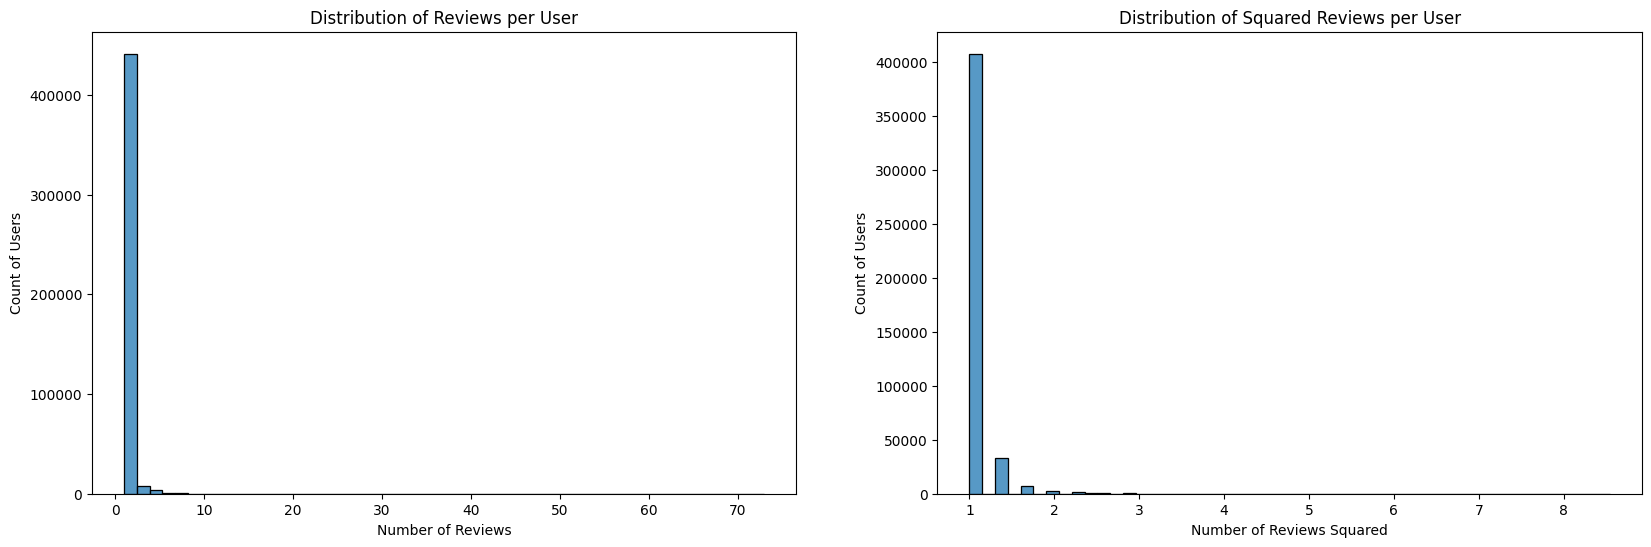

In [14]:
# Number of reviews per user distribution
# Calculate reviews per user
reviews_per_user = df_reviews['reviewer_id'].value_counts()

# Create distribution plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(data=reviews_per_user, bins=50)
plt.title('Distribution of Reviews per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Count of Users')

# Squared distribution 
plt.subplot(1, 2, 2)
sns.histplot(data=np.sqrt(reviews_per_user), bins=50)
plt.title('Distribution of Squared Reviews per User')
plt.xlabel('Number of Reviews Squared')
plt.ylabel('Count of Users')

# Print summary statistics
print("Reviews per user summary statistics:")
print(reviews_per_user.describe())

# Show percentage of users with different review counts
print("\nPercentage of users by review count:")
for n in [1, 2, 3, 5, 10]:
    pct = (reviews_per_user == n).mean() * 100
    print(f"Users with exactly {n} review(s): {pct:.1f}%")

pct_single = (reviews_per_user == 1).mean() * 100
print(f"\nPercentage of users with only 1 review: {pct_single:.1f}%")


For Seattle listings
The average of all listing ratings is: 4.81
The median of all listing ratings is: 4.90


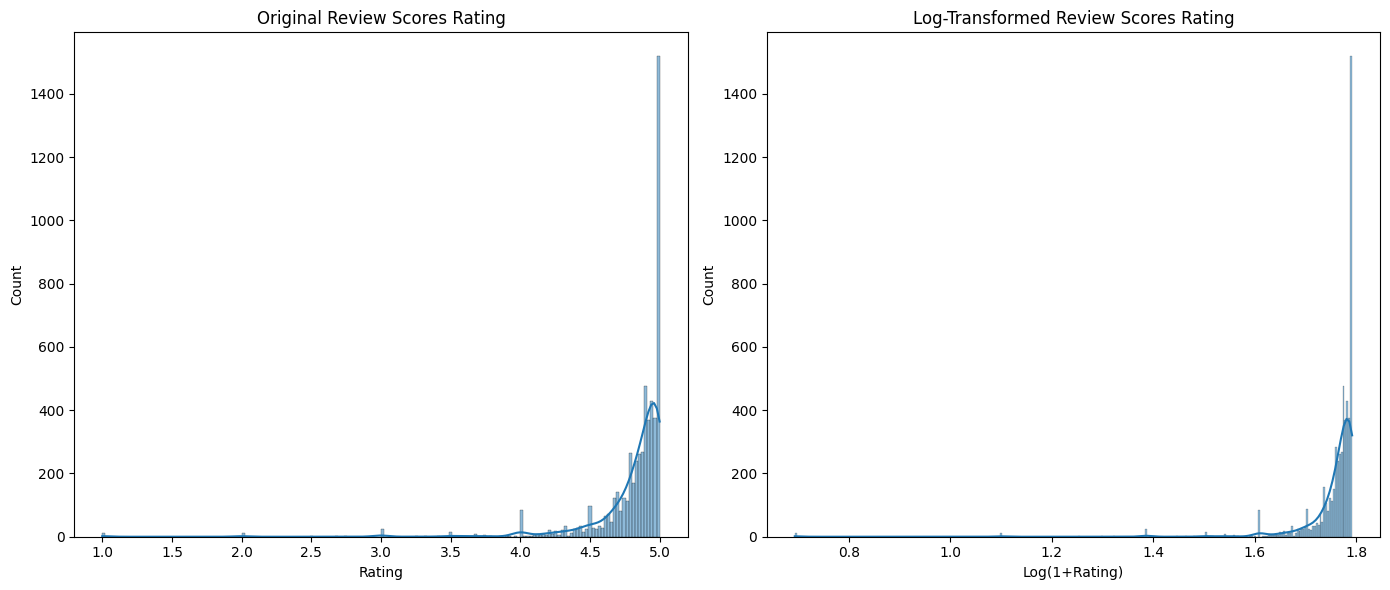

In [23]:
print("For Seattle listings")
# Calculate the average of the average ratings
average_rating = df_listings['review_scores_rating'].mean()

print(f"The average of all listing ratings is: {average_rating:.2f}")

median_rating = df_listings['review_scores_rating'].median()

print(f"The median of all listing ratings is: {median_rating:.2f}")


# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the original distribution
sns.histplot(df_listings['review_scores_rating'], kde=True, ax=axes[0])
axes[0].set_title('Original Review Scores Rating')
axes[0].set_xlabel('Rating')

# Create the logged version (adding a small constant to handle zeros if present)
# Using log1p (log(1+x)) which is a common transformation to handle zeros
logged_ratings = np.log1p(df_listings['review_scores_rating'])
sns.histplot(logged_ratings, kde=True, ax=axes[1])
axes[1].set_title('Log-Transformed Review Scores Rating')
axes[1].set_xlabel('Log(1+Rating)')

plt.tight_layout()
plt.show()

